In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PMKE8asgbmMhiMgANvvW")
project = rf.workspace("patrick-neicu").project("forestguard-romania")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to ForestGuard-Romania-1 in yolov8:: 100%|██████████| 6624/6624 [00:01<00:00, 3951.54it/s]


In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 51.1 MB/s eta 0:00:00


In [15]:
model = YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:02<00:00, 41.8MB/s]


In [8]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [9]:
import yaml

# Load the YAML file
yaml_path = '/content/ForestGuard-Romania-1/data.yaml'
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Update paths to absolute paths
data['train'] = '/content/ForestGuard-Romania-1/train/images'
data['val'] = '/content/ForestGuard-Romania-1/valid/images'
data['test'] = '/content/ForestGuard-Romania-1/test/images'

# Save the updated YAML file
with open(yaml_path, 'w') as file:
    yaml.dump(data, file)

print("Updated data.yaml with absolute paths")


Updated data.yaml with absolute paths


In [ ]:
results = model.train(data='/content/ForestGuard-Romania-1/data.yaml', epochs=100, imgsz=640, lr0=0.001)


Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/ForestGuard-Romania-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

train: Scanning /content/ForestGuard-Romania-1/train/labels.cache... 2892 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2892/2892 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 24990, len(boxes) = 200820. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/ForestGuard-Romania-1/valid/labels.cache... 269 images, 0 backgrounds, 0 corrupt: 100%|██████████| 269/269 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 476, len(boxes) = 20214. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.7G      1.246     0.8307     0.9966        741        640: 100%|██████████| 181/181 [01:09<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]

                   all        269      20214      0.885      0.873      0.884      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.74G      1.238     0.7534      1.005        823        640: 100%|██████████| 181/181 [01:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]


                   all        269      20214      0.893      0.866       0.91      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.76G       1.22      0.717      1.004       1025        640: 100%|██████████| 181/181 [01:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]


                   all        269      20214      0.891      0.877      0.914      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.2G      1.209     0.6824      1.002        814        640: 100%|██████████| 181/181 [01:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]

                   all        269      20214      0.888      0.885      0.913      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.46G      1.184     0.6602      0.992       1460        640: 100%|██████████| 181/181 [01:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]

                   all        269      20214      0.892      0.884      0.924      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.68G       1.18     0.6438     0.9899       1281        640: 100%|██████████| 181/181 [01:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        269      20214      0.892      0.894      0.923       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.8G      1.161     0.6344     0.9847       1302        640: 100%|██████████| 181/181 [01:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all        269      20214      0.899      0.894       0.93      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.55G      1.151     0.6224     0.9825        659        640: 100%|██████████| 181/181 [01:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        269      20214      0.887      0.901      0.921      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.43G      1.146       0.61     0.9779       1065        640: 100%|██████████| 181/181 [01:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]

                   all        269      20214      0.895      0.893      0.911      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.8G      1.127     0.5963     0.9739       1089        640: 100%|██████████| 181/181 [01:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]

                   all        269      20214      0.896      0.889      0.928      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.18G      1.121      0.591     0.9734        753        640: 100%|██████████| 181/181 [01:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        269      20214      0.901       0.89      0.931       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.55G      1.109     0.5876     0.9669       1292        640: 100%|██████████| 181/181 [01:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]

                   all        269      20214      0.895      0.898      0.926       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       8.3G      1.114      0.585     0.9689        981        640: 100%|██████████| 181/181 [01:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]


                   all        269      20214      0.894      0.889      0.928      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       8.5G      1.103     0.5775     0.9643        729        640: 100%|██████████| 181/181 [01:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]

                   all        269      20214       0.89      0.907      0.931      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       8.5G      1.224     0.6509      1.007       1084        640: 100%|██████████| 181/181 [01:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]

                   all        269      20214     0.0216     0.0139     0.0078    0.00246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       9.5G      1.714     0.9738      1.203       1270        640: 100%|██████████| 181/181 [01:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        269      20214      0.834      0.798      0.805      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.4G      1.793      1.017      1.239        759        640: 100%|██████████| 181/181 [01:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        269      20214      0.851      0.799       0.82       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.1G      1.813      1.027      1.255       1791        640: 100%|██████████| 181/181 [01:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

                   all        269      20214      0.851      0.799      0.818      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.92G      1.789      1.012      1.236       1001        640: 100%|██████████| 181/181 [01:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]

                   all        269      20214      0.852      0.799      0.818      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.8G      1.795      1.026      1.238       1636        640: 100%|██████████| 181/181 [01:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.9G        nan        nan        nan        752        640: 100%|██████████| 181/181 [01:01<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.4G        nan        nan        nan       1466        640: 100%|██████████| 181/181 [01:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.5G        nan        nan        nan        919        640: 100%|██████████| 181/181 [01:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.11G        nan        nan        nan        847        640: 100%|██████████| 181/181 [01:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.25G        nan        nan        nan        765        640: 100%|██████████| 181/181 [01:05<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.85it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.5G        nan        nan        nan       1728        640: 100%|██████████| 181/181 [01:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.11G        nan        nan        nan       1253        640: 100%|██████████| 181/181 [01:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.88G        nan        nan        nan       1682        640: 100%|██████████| 181/181 [01:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.75G        nan        nan        nan       1173        640: 100%|██████████| 181/181 [01:04<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.56G        nan        nan        nan       1436        640: 100%|██████████| 181/181 [01:01<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.29G        nan        nan        nan       1239        640: 100%|██████████| 181/181 [01:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.63it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.94G        nan        nan        nan        899        640: 100%|██████████| 181/181 [01:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.3G        nan        nan        nan        691        640: 100%|██████████| 181/181 [01:04<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.94G        nan        nan        nan        677        640: 100%|██████████| 181/181 [01:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.62G        nan        nan        nan       1456        640: 100%|██████████| 181/181 [01:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.62G        nan        nan        nan        913        640: 100%|██████████| 181/181 [01:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.66it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        11G        nan        nan        nan       1358        640: 100%|██████████| 181/181 [01:05<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100        13G        nan        nan        nan        448        640: 100%|██████████| 181/181 [01:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      13.7G        nan        nan        nan        930        640: 100%|██████████| 181/181 [01:01<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.28it/s]


                   all        269      20214      0.854        0.8      0.821       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      13.9G        nan        nan        nan       1329        640: 100%|██████████| 181/181 [01:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.61G        nan        nan        nan        871        640: 100%|██████████| 181/181 [01:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.07G        nan        nan        nan       1226        640: 100%|██████████| 181/181 [01:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.75G        nan        nan        nan       1178        640: 100%|██████████| 181/181 [01:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.93G        nan        nan        nan       1458        640: 100%|██████████| 181/181 [01:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.68it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       9.1G        nan        nan        nan        974        640: 100%|██████████| 181/181 [01:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        11G        nan        nan        nan        628        640: 100%|██████████| 181/181 [01:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.4G        nan        nan        nan        611        640: 100%|██████████| 181/181 [01:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.82G        nan        nan        nan       1020        640: 100%|██████████| 181/181 [01:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.74G        nan        nan        nan       1244        640: 100%|██████████| 181/181 [01:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.4G        nan        nan        nan       1506        640: 100%|██████████| 181/181 [01:01<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100        11G        nan        nan        nan        949        640: 100%|██████████| 181/181 [01:05<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.1G        nan        nan        nan        887        640: 100%|██████████| 181/181 [01:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.4G        nan        nan        nan       1228        640: 100%|██████████| 181/181 [01:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.21G        nan        nan        nan       1086        640: 100%|██████████| 181/181 [01:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.73G        nan        nan        nan       1966        640: 100%|██████████| 181/181 [01:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]


                   all        269      20214      0.854        0.8      0.821       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.3G        nan        nan        nan        856        640: 100%|██████████| 181/181 [01:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.48it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.8G        nan        nan        nan       1445        640: 100%|██████████| 181/181 [01:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.4G        nan        nan        nan       1376        640: 100%|██████████| 181/181 [01:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.33G        nan        nan        nan        899        640: 100%|██████████| 181/181 [01:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.19G        nan        nan        nan        897        640: 100%|██████████| 181/181 [01:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.74it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.1G        nan        nan        nan       1232        640: 100%|██████████| 181/181 [01:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.9G        nan        nan        nan       1189        640: 100%|██████████| 181/181 [01:01<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.6G        nan        nan        nan        891        640: 100%|██████████| 181/181 [01:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.2G        nan        nan        nan       1024        640: 100%|██████████| 181/181 [01:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.73it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.9G        nan        nan        nan        879        640: 100%|██████████| 181/181 [01:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.05it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.8G        nan        nan        nan       1467        640: 100%|██████████| 181/181 [01:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.04it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.78G        nan        nan        nan       1360        640: 100%|██████████| 181/181 [01:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.2G        nan        nan        nan       1107        640: 100%|██████████| 181/181 [01:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.3G        nan        nan        nan       1022        640: 100%|██████████| 181/181 [01:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.24G        nan        nan        nan       1130        640: 100%|██████████| 181/181 [01:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.01G        nan        nan        nan       1052        640: 100%|██████████| 181/181 [01:02<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.1G        nan        nan        nan       1117        640: 100%|██████████| 181/181 [01:04<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.61it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.1G        nan        nan        nan       1573        640: 100%|██████████| 181/181 [01:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.13G        nan        nan        nan        731        640: 100%|██████████| 181/181 [01:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.72it/s]


                   all        269      20214      0.854        0.8      0.821       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.71G        nan        nan        nan       1606        640: 100%|██████████| 181/181 [01:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.81G        nan        nan        nan       1032        640: 100%|██████████| 181/181 [01:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.2G        nan        nan        nan        950        640: 100%|██████████| 181/181 [01:01<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.31G        nan        nan        nan       1036        640: 100%|██████████| 181/181 [01:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.92G        nan        nan        nan       1250        640: 100%|██████████| 181/181 [01:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.70it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       9.9G        nan        nan        nan       1181        640: 100%|██████████| 181/181 [01:06<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.9G        nan        nan        nan       1181        640: 100%|██████████| 181/181 [01:07<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.76it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.9G        nan        nan        nan        567        640: 100%|██████████| 181/181 [01:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.05G        nan        nan        nan        990        640: 100%|██████████| 181/181 [01:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.77G        nan        nan        nan        902        640: 100%|██████████| 181/181 [01:05<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.72G        nan        nan        nan        749        640: 100%|██████████| 181/181 [01:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]


                   all        269      20214      0.854        0.8      0.821       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.5G        nan        nan        nan       1758        640: 100%|██████████| 181/181 [01:04<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.75it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.7G        nan        nan        nan       1019        640: 100%|██████████| 181/181 [01:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.85G        nan        nan        nan       1597        640: 100%|██████████| 181/181 [01:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.7G        nan        nan        nan       2237        640: 100%|██████████| 181/181 [01:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.46G        nan        nan        nan        921        640: 100%|██████████| 181/181 [01:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        269      20214      0.854        0.8      0.821       0.43


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.82G        nan        nan        nan       1128        640: 100%|██████████| 181/181 [01:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.45G        nan        nan        nan        779        640: 100%|██████████| 181/181 [00:58<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.81G        nan        nan        nan        490        640: 100%|██████████| 181/181 [00:59<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.54G        nan        nan        nan       1279        640: 100%|██████████| 181/181 [00:59<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.66G        nan        nan        nan        403        640: 100%|██████████| 181/181 [00:58<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.90it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.25G        nan        nan        nan        444        640: 100%|██████████| 181/181 [00:59<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.74G        nan        nan        nan        616        640: 100%|██████████| 181/181 [00:58<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.26G        nan        nan        nan        962        640: 100%|██████████| 181/181 [01:00<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.79G        nan        nan        nan        722        640: 100%|██████████| 181/181 [00:59<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.86G        nan        nan        nan        662        640: 100%|██████████| 181/181 [01:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.64it/s]

                   all        269      20214      0.854        0.8      0.821       0.43



100 epochs completed in 1.872 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:15<00:00,  1.77s/it]


                   all        269      20214       0.89      0.907      0.931      0.681
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train3


In [ ]:

# Customize validation settings
validation_results = model.val(data='/content/ForestGuard-Romania-1/data.yaml', imgsz=640, batch=16, conf=0.25, iou=0.6, device="0")

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/ForestGuard-Romania-1/valid/labels.cache... 269 images, 0 backgrounds, 0 corrupt: 100%|██████████| 269/269 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 476, len(boxes) = 20214. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:16<00:00,  1.03it/s]


                   all        269      20214      0.889      0.915      0.937      0.714
Speed: 0.5ms preprocess, 6.0ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train32



0: 640x640 2 teddy bears, 59.9ms
1: 640x640 1 bowl, 5 clocks, 59.9ms
Speed: 2.7ms preprocess, 59.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Number of detected bounding boxes in image 1: 2


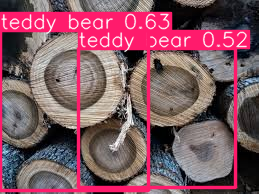

Number of detected bounding boxes in image 2: 6


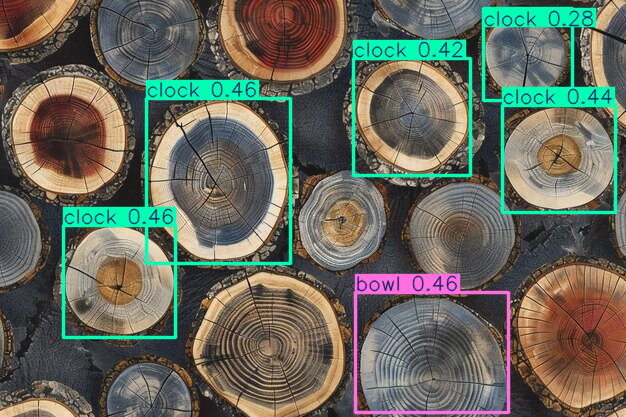

In [28]:
from PIL import Image


# Run inference on 'bus.jpg'
results = model.predict(["/content/testing image.jpg", "/content/test1.jpg",])  # results list

# Visualize the results
for i, r in enumerate(results):
    num_boxes = len(r.boxes)
    print(f"Number of detected bounding boxes in image {i+1}: {num_boxes}")
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")